In [1]:
# SHAP可以解释任何机器学习模型的输出，支持XGBoost, LightGBM, CatBoost, scikit-learn和pyspark树模型的快速c++实现
# XGBoost二分类问题的SHAP解释
from sklearn.datasets import load_iris
import xgboost as xgb
import pandas as pd
import matplotlib.pylab as pl
import numpy as np
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import accuracy_score
import shap
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 导入数据集
iris = load_iris()
DataSets ,LabelSets = iris.data,iris.target
feature_names = np.array(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [3]:
# 打印数据集
print('DataSets:',DataSets.shape,type(DataSets))
print('LabelSets:',LabelSets.shape,type(LabelSets))
print('FeatureNames:',feature_names,type(feature_names))
print('DataSets:\n',DataSets)
print('LabelSets:\n',LabelSets)

DataSets: (150, 4) <class 'numpy.ndarray'>
LabelSets: (150,) <class 'numpy.ndarray'>
FeatureNames: ['Sepal Length' 'Sepal Width' 'Petal Length' 'Petal Width'] <class 'numpy.ndarray'>
DataSets:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.

In [4]:
# 划分训练接和测试集
x_train,x_test,y_train,y_test = train_test_split(DataSets,LabelSets,test_size=0.2,random_state=0)

In [5]:
# 打印训练集和测试集
print('x_train:',x_train.shape,type(x_train))
print('x_test:',x_test.shape,type(x_test))
print('y_train:',y_train.shape,type(y_train))
print('y_test:',y_test.shape,type(y_test))

x_train: (120, 4) <class 'numpy.ndarray'>
x_test: (30, 4) <class 'numpy.ndarray'>
y_train: (120,) <class 'numpy.ndarray'>
y_test: (30,) <class 'numpy.ndarray'>


In [6]:
# 封装训练集和测试集
pd_x_train = pd.DataFrame(x_train, columns=feature_names)
pd_x_test = pd.DataFrame(x_test, columns=feature_names)

In [7]:
# 打印训练集和测试集数据的前几条数据
print('x_train:\n', pd_x_train.head())
print('x_test:\n', pd_x_test.head())

x_train:
    Sepal Length  Sepal Width  Petal Length  Petal Width
0           6.4          3.1           5.5          1.8
1           5.4          3.0           4.5          1.5
2           5.2          3.5           1.5          0.2
3           6.1          3.0           4.9          1.8
4           6.4          2.8           5.6          2.2
x_test:
    Sepal Length  Sepal Width  Petal Length  Petal Width
0           5.8          2.8           5.1          2.4
1           6.0          2.2           4.0          1.0
2           5.5          4.2           1.4          0.2
3           7.3          2.9           6.3          1.8
4           5.0          3.4           1.5          0.2


In [8]:
# 创建模型并训练数据
model = xgb.XGBClassifier(max_depth=5,learning_rate=0.1,n_estimators=160,objective='multi:softmax', eval_metric='mlogloss')
model.fit(pd_x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=160, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [9]:
# 对测试集进行预测
pred_y_test = model.predict(pd_x_test)

In [10]:
# 计算准确率
accuracy = accuracy_score(y_test,pred_y_test)
print('accuracy:%2.f%%'%(accuracy*100))

accuracy:100%


In [11]:
print(np.stack([y_test,pred_y_test],axis=0))

[[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]]


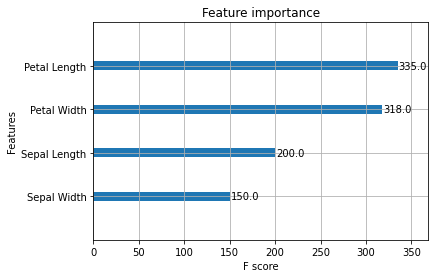

In [12]:
# 显示重要特征
plot_importance(model)
plt.show()

In [13]:
# 用SHAP解释模型
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(pd_x_train)

In [14]:
# 打印所有样本的相关SHAP相关解释量
print('Shap values:\n',shap_values)
print('SHAP值维度：',shap_values.values.shape)
print('Base Value维度：',shap_values.base_values.shape)
print('输入数据特征维度：',shap_values.data.shape)
print('Base Value:',explainer.expected_value)

Shap values:
 .values =
array([[[-0.01717839,  0.10412917,  0.33857816],
        [ 0.        ,  0.00726517, -0.19758318],
        [-2.346252  , -1.6657944 ,  2.0334587 ],
        [-0.04514869, -1.1017357 ,  1.6063225 ]],

       [[ 0.0172181 , -0.8074285 , -0.55596954],
        [ 0.        ,  0.04946668,  0.01639138],
        [-2.346252  ,  1.6686238 , -1.8940163 ],
        [-0.04514869,  0.60009027, -1.0477625 ]],

       [[ 0.0172181 , -0.8551944 , -0.55596954],
        [ 0.        , -0.02504487, -0.43833587],
        [ 3.1113322 , -2.0766325 , -2.0305486 ],
        [ 0.04731818,  0.21152909, -1.0328217 ]],

       ...,

       [[-0.01717839,  0.27629012, -0.40626273],
        [ 0.        ,  0.16335292, -0.13378921],
        [-2.346252  ,  1.8316767 , -1.8977101 ],
        [ 0.04731818,  0.6328803 , -1.2536913 ]],

       [[-0.01717839,  0.10262193,  0.33857816],
        [ 0.        ,  0.01027966, -0.19758318],
        [-2.346252  , -1.6673017 ,  2.0334587 ],
        [-0.04514869, -1

In [15]:
# 打印第which_class第idx样本的相关SHAP相关解释量
idx = 10
which_class = 2
print('Shap values:\n',shap_values[idx, :, which_class])
print('SHAP值维度：',shap_values[idx, :, which_class].values.shape)
print('Base Value维度：',shap_values[idx, :, which_class].base_values.shape)
print('输入数据特征维度：',shap_values[idx, :, which_class].data.shape)
print('Base Value:',explainer.expected_value[which_class])

Shap values:
 .values =
array([0.33857816, 0.17127205, 1.7639796 , 1.6996927 ], dtype=float32)

.base_values =
0.7786268

.data =
array([6.8, 3. , 5.5, 2.1])
SHAP值维度： (4,)
Base Value维度： ()
输入数据特征维度： (4,)
Base Value: 0.7786268


In [16]:
#定义一个函数，将多类的对数几率转换为概率
def logodds_to_proba(logodds):
    return np.exp(logodds)/np.exp(logodds).sum()
#为我们的数据行生成预测并进行转换
X_rand = pd_x_train.sample(1, random_state=42)
print(X_rand)
# 预测出的对数几率
logodds = model.predict(X_rand, output_margin=True)
print('logodds形状：', logodds.shape)
# 预测出的概率
probas = model.predict_proba(X_rand)
print('probas形状：', probas.shape)
for which_class in range(0,3):
    # 预测出的对数几率转化为概率
    converted_prob_val = logodds_to_proba(logodds)[0][which_class]
    # 预测出的概率
    proba = probas[0][which_class]

    print('Class: ',which_class)
    print('Converted Proba value:', converted_prob_val)
    print('Proba value:', proba, '\n')

    Sepal Length  Sepal Width  Petal Length  Petal Width
44           6.9          3.1           4.9          1.5
logodds形状： (1, 3)
probas形状： (1, 3)
Class:  0
Converted Proba value: 0.0034839858
Proba value: 0.0034839858 

Class:  1
Converted Proba value: 0.9693456
Proba value: 0.96934557 

Class:  2
Converted Proba value: 0.027170392
Proba value: 0.02717039 



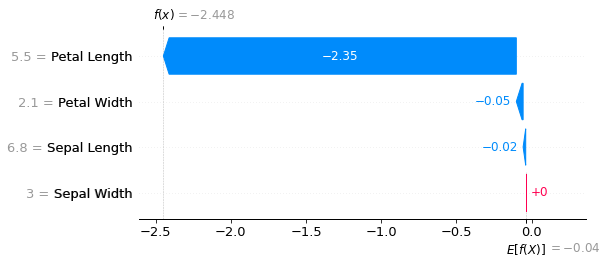

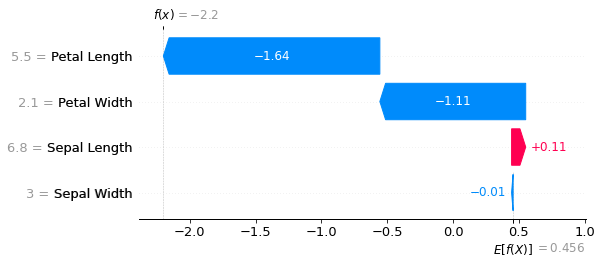

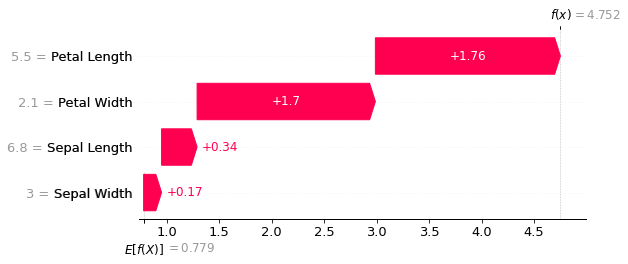

In [17]:
# 解释第which_class第idx样本：解释第which_class第idx个样本的shap值组成及变化
#每个特性都有助于将模型输出从基值(我们传递的训练数据集上的平均模型输出)推到模型输出。将预测推高的特征用红色表示，将预测推低的特征用蓝色表示。
# 纵轴为原始数据特性值，横轴为shap value，条形为每个特性shap value贡献的起始和终止长度及方向
for which_class in range(0,3):
    shap.plots.waterfall(shap_values[idx, :, which_class])

In [18]:
# 解释第which_class第idx样本：解释第which_class第idx个样本的shap值组成及变化
shap.plots.force(shap_values[idx, :, which_class])

In [19]:
# 解释第which_class类所有样本：解释第which_class类所有样本的shap值组成及变化
# 如果我们使用许多力图解释，如上图所示，将它们旋转90度，然后水平堆叠，我们可以看到整个数据集的解释(在笔记本中，这个图是交互的):
# 注：横轴坐标和纵轴坐标可以选择，点击对应位置的下拉菜单即可
shap.plots.force(shap_values[:, :, which_class])

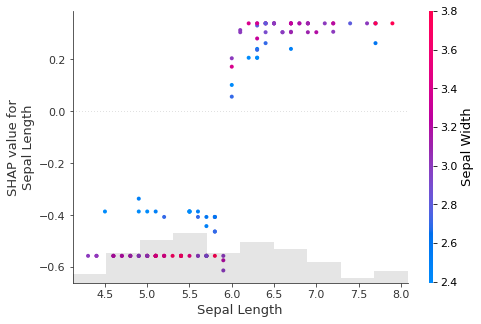

In [20]:
# 解释第which_class类所有样本（单特征对输出shap值影响）：为了理解所有样本的单个特性如何影响模型的输出，我们可以绘制该特性的SHAP值与数据集中所有示例的特性值的对比图。SHAP值表示了特性对模型输出更改的贡献
# 横坐标轴特定取值处的垂直离散表示该特征与其他特征的交互效应。为了帮助揭示这些相互作用，我们可以用另一个特征来着色。
# 横坐标表示对应特征，左纵坐标表示对应的shap值，右颜色图表示与该特征相互作用比较明显的特征取值范围
shap.plots.scatter(shap_values[:, :, which_class][:, "Sepal Length"], color=shap_values[:, :, which_class])

(120, 4, 4)


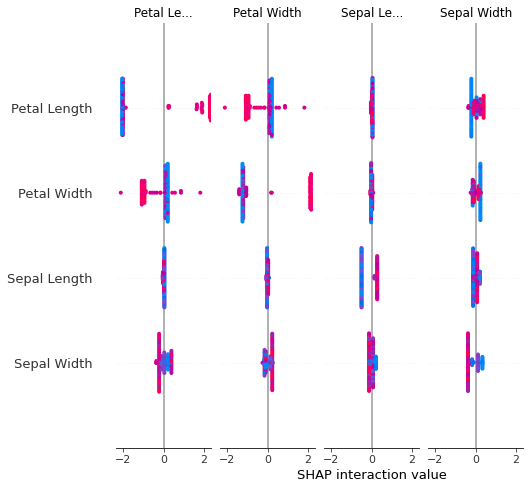

In [21]:
# 解释第which_class类所有样本（特征与特征间的交互shap影响）：XGBoost为每个预测返回一个矩阵，其中主要影响在对角线上，而交互影响是非对角线上。主要效应类似于线性模型的SHAP值，交互效应捕获了所有高阶相互作用，并将它们划分到成对的相互作用项中。
# 请注意，整个交互矩阵的总和是模型当前输出和预期输出之间的差，因此非对角线上的交互影响被分成两半(因为每一种都有两种)。当绘制交互效果时，SHAP包会自动将非对角线值乘以2以获得完整的交互效果。
shap_interaction_values = explainer.shap_interaction_values(pd_x_train)
print(shap_interaction_values[which_class].shape)
shap.summary_plot(shap_interaction_values[which_class], pd_x_train)

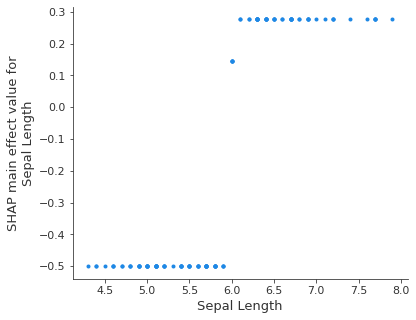

In [22]:
# 解释第which_class类所有样本（主效应）：运行SHAP交互值的依赖关系图，使我们能够分别观察主效应和交互效应
shap.dependence_plot(("Sepal Length", "Sepal Length"), shap_interaction_values[which_class], pd_x_train)

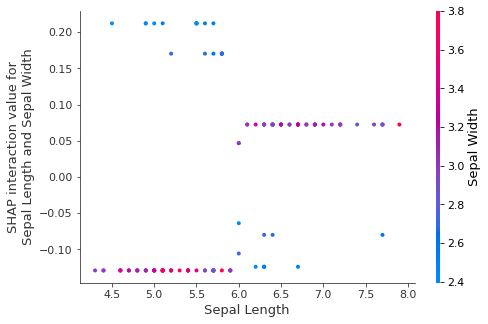

In [23]:
# 解释第which_class类所有样本（交互效应）：运行SHAP交互值的依赖关系图，使我们能够分别观察主效应和交互效应
# 这些效应捕获了所有在原始SHAP图中存在但在上面的主要效应图中缺失的垂直扩散。
shap.dependence_plot(("Sepal Length", "Sepal Width"), shap_interaction_values[which_class], pd_x_train)

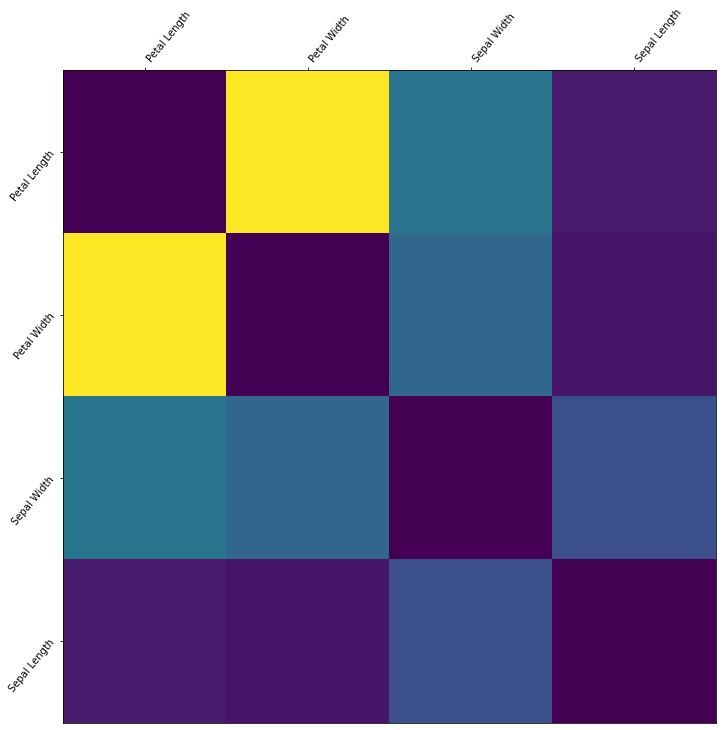

In [24]:
# 解释第which_class类所有样本（交互效应）：运行SHAP交互值的依赖关系图，使我们能够分别观察主效应和交互效应
tmp = np.abs(shap_interaction_values[which_class]).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:50]
tmp2 = tmp[inds,:][:,inds]
pl.figure(figsize=(12,12))
pl.imshow(tmp2)
pl.yticks(range(tmp2.shape[0]), pd_x_train.columns[inds], rotation=50.4, horizontalalignment="right")
pl.xticks(range(tmp2.shape[0]), pd_x_train.columns[inds], rotation=50.4, horizontalalignment="left")
pl.gca().xaxis.tick_top()
pl.show()

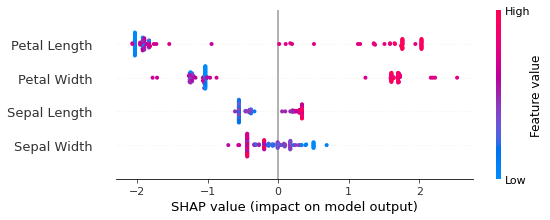

In [25]:
# 解释第which_class类所有样本：为了获得对模型最重要的特性的概述，我们可以绘制所有样本的每个特性的SHAP值。
# 下图根据所有样本的SHAP值大小的总和对特征进行排序，并使用SHAP值显示每个特征对模型输出的影响分布。
# 颜色代表特征值(红色高，蓝色低)。
# 横坐标表示某一特征的shap值的取值范围（即对output的影响范围），纵坐标表示对应特征
shap.plots.beeswarm(shap_values[:, :, which_class])

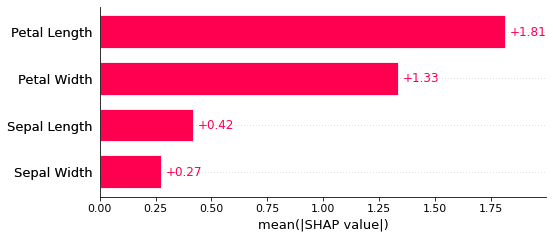

In [26]:
# 解释第which_class类所有样本：我们也可以取每个特性的SHAP值的绝对值的平均值来得到一个标准的条形图(为多类输出生成堆叠的条形图):
# 横坐标所有样本在某一特征上shap值绝对值的平均值，纵坐标为对应特征
shap.plots.bar(shap_values[:, :, which_class])